<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-необходимых-инстументов" data-toc-modified-id="Загрузка-необходимых-инстументов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка необходимых инстументов</a></span></li><li><span><a href="#Обзор-обучающего-датасета" data-toc-modified-id="Обзор-обучающего-датасета-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор обучающего датасета</a></span><ul class="toc-item"><li><span><a href="#Проверяем-на-пропуски" data-toc-modified-id="Проверяем-на-пропуски-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверяем на пропуски</a></span></li><li><span><a href="#Проверка-на-дублирование-строк" data-toc-modified-id="Проверка-на-дублирование-строк-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на дублирование строк</a></span></li><li><span><a href="#Смотрим-на-числовые-параметры" data-toc-modified-id="Смотрим-на-числовые-параметры-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Смотрим на числовые параметры</a></span></li><li><span><a href="#Размечаем-категориальные-и-нумеративные-признаки" data-toc-modified-id="Размечаем-категориальные-и-нумеративные-признаки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Размечаем категориальные и нумеративные признаки</a></span></li></ul></li><li><span><a href="#Анализ-целевой-метки-и-категориальных-признаков" data-toc-modified-id="Анализ-целевой-метки-и-категориальных-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ целевой метки и категориальных признаков</a></span><ul class="toc-item"><li><span><a href="#Баланс-целевой-метки" data-toc-modified-id="Баланс-целевой-метки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Баланс целевой метки</a></span></li><li><span><a href="#Пол" data-toc-modified-id="Пол-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Пол</a></span></li><li><span><a href="#Тип-боли-в-груди" data-toc-modified-id="Тип-боли-в-груди-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тип боли в груди</a></span></li><li><span><a href="#Уровень-сахара-в-крови" data-toc-modified-id="Уровень-сахара-в-крови-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Уровень сахара в крови</a></span></li><li><span><a href="#Талассемия" data-toc-modified-id="Талассемия-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Талассемия</a></span></li><li><span><a href="#Результаты-электрокардиографии" data-toc-modified-id="Результаты-электрокардиографии-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Результаты электрокардиографии</a></span></li><li><span><a href="#Аномалия-коронарной-артерии" data-toc-modified-id="Аномалия-коронарной-артерии-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Аномалия коронарной артерии</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Матрица корреляций</a></span></li><li><span><a href="#Scatter-Plot" data-toc-modified-id="Scatter-Plot-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Scatter Plot</a></span></li><li><span><a href="#Boxen-Plot" data-toc-modified-id="Boxen-Plot-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Boxen Plot</a></span></li><li><span><a href="#Pair-Plot" data-toc-modified-id="Pair-Plot-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Pair Plot</a></span></li></ul></li><li><span><a href="#KNN" data-toc-modified-id="KNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Реализация-конвеера" data-toc-modified-id="Реализация-конвеера-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Реализация конвеера</a></span></li></ul></div>

# Загрузка необходимых инстументов


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve, f1_score, precision_score, r2_score)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from scipy.stats import mannwhitneyu
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
%config InlineBackend.figure_format = 'png'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Обзор обучающего датасета

This dataset contains information about people and there chances of having a heart stroke.

Dataset Information:

Age : Возраст пациента

Sex : Пол пациента

exang: стенокардия, вызванная физической нагрузкой (1 = Да; 0 = нет)

ca: количество крупных судов (0-3)

cp : Тип боли в груди 
    Value 1: типичная ангина
    Value 2: атипичная ангина
    Value 3: неангинальная боль
    Value 4: бессимптомный
 
trtbps : артериальное давление в покое (в мм рт)

chol : холесторал в мг / дл, полученный с помощью датчика ИМТ

fbs : (уровень сахара в крови натощак> 120 мг / дл) (1 = да; 0 = нет)

rest_ecg : результаты электрокардиографии в покое
    Value 0: обычный
    Value 1: наличие аномалии ST-T (инверсия зубца T и / или элевация или депрессия ST> 0,05 мВ)
    Value 2: показывающие вероятную или определенную гипертрофию левого желудочка по критериям Эстеса

thalach : достигнута максимальная частота сердечных сокращений

exng: Стенокардия, вызванная физическими упражнениями (1: да, 0: нет)

oldpeak : Упражнения относительно отдыха

slp : Информация недоступна

caa : Аномалия коронарной артерии (CAA) - это врожденный дефект, характеризующий коронарные артерии аномальной формы, приводящий к сердечной недостаточности.

thall : Талассемия - это наследственное заболевание крови, из-за которого в вашем организме остается меньше гемоглобина, чем обычно.

output :
    0 - меньше шанса сердечного приступа
    1 - больше шанса сердечного приступа

In [3]:
df = pd.read_csv('heart.csv')

## Проверяем на пропуски

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Пропущенных значений нет.



## Проверка на дублирование строк

In [5]:
df.duplicated().sum()

1

Есть дубликаты, удаляем их.

In [6]:
df.drop_duplicates(inplace=True)

## Смотрим на числовые параметры

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


Среднее кровяное давление человека составляет 131, тогда как максимальное значение достигает 200.

Средняя частота пульса в группе составляет 149, тогда как в целом она колеблется от 133 до 202.

Возраст группы от 29 до 77 лет, средний возраст - 54 года.

## Размечаем категориальные и нумеративные признаки 

In [8]:
name_columns = list(df.columns.values)
name_columns

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [9]:
numerical = ['age','trtbps','chol','thalachh','oldpeak']
categorical = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

# Анализ целевой метки и категориальных признаков

## Баланс целевой метки 

In [10]:
data = df['output'].value_counts()
data

1    164
0    138
Name: output, dtype: int64

Text(0.5, 1.0, 'Вероятность сердечного приступа')

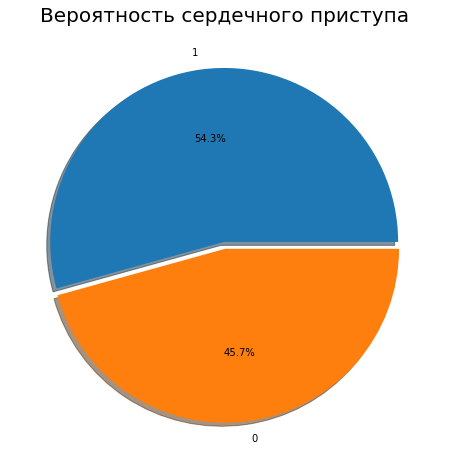

In [11]:
pie, ax = plt.subplots(figsize=[10,8])
labels = data.keys()
plt.pie(x=data, explode=[0.02]*2, autopct='%1.1f%%', labels=labels, shadow=True)
plt.title('Вероятность сердечного приступа', fontsize=20)

Дисбаланса практически нет, можно считать целевую метку сбалансированой.

## Пол

In [12]:
data = df['sex'].value_counts()
data

1    206
0     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Пол пациента')

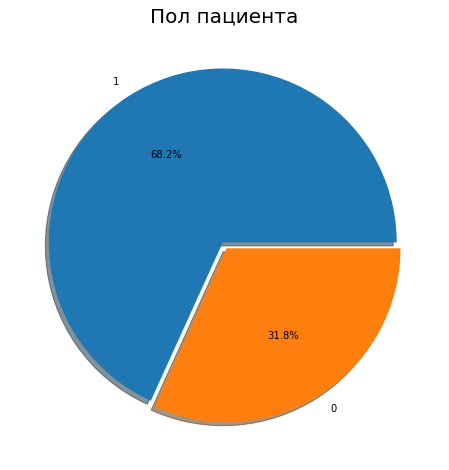

In [13]:
pie, ax = plt.subplots(figsize=[10,8])
labels = data.keys()
plt.pie(x=data, explode=[0.02]*2, autopct='%1.1f%%', labels=labels, shadow=True)
plt.title('Пол пациента', fontsize=20)

Число людей, принадлежащих к категории пола 0, составляет 96 человек, тогда как 1 - 206 человек.
Количество людей в 1 категории более чем вдвое больше 0.

## Тип боли в груди

In [14]:
data = df['cp'].value_counts()
data

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

Text(0.5, 1.0, 'Тип боли в груди')

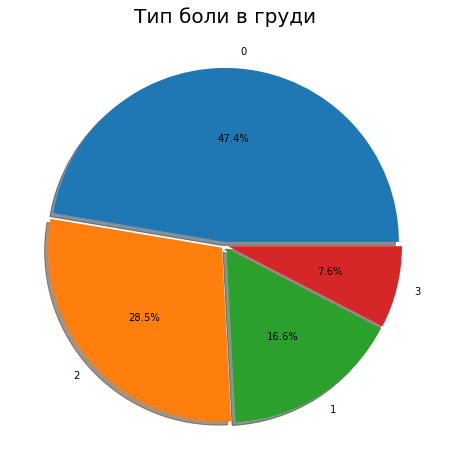

In [15]:
pie, ax = plt.subplots(figsize=[10,8])
labels = data.keys()
plt.pie(x=data, explode=[0.02]*4, autopct='%1.1f%%', labels=labels, shadow=True)
plt.title('Тип боли в груди', fontsize=20)

Тип боли в груди

Значение 0: типичная стенокардия
    
Значение 1: атипичная стенокардия.
    
Значение 2: неангинальная боль
    
Значение 3: бессимптомно.
    
Люди с категорией боли в груди «0» преобладают, тогда как количество болей в груди «3» является самым низким.

## Уровень сахара в крови

In [16]:
data = df['fbs'].value_counts()
data

0    257
1     45
Name: fbs, dtype: int64

Text(0.5, 1.0, 'Уровень сахара в крови натощак> 120 мг / дл')

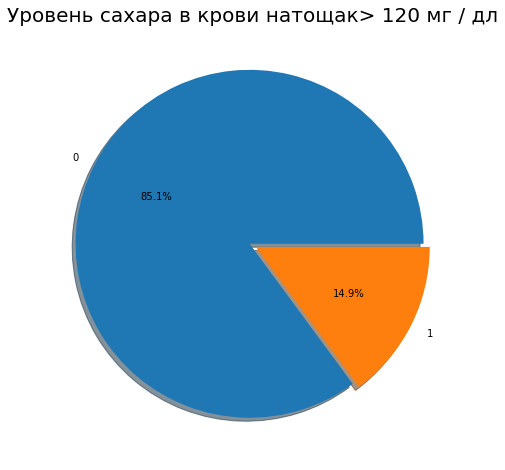

In [17]:
pie, ax = plt.subplots(figsize=[10,8])
labels = data.keys()
plt.pie(x=data, explode=[0.02]*2, autopct='%1.1f%%', labels=labels, shadow=True)
plt.title('Уровень сахара в крови натощак> 120 мг / дл', fontsize=20)

Людей с положительным тестом около 15%

## Талассемия

In [18]:
data = df['thall'].value_counts()
data

2    165
3    117
1     18
0      2
Name: thall, dtype: int64

Text(0.5, 1.0, 'Талассемия')

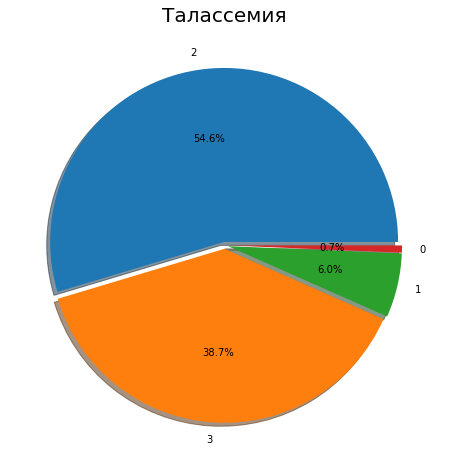

In [19]:
pie, ax = plt.subplots(figsize=[10,8])
labels = data.keys()
plt.pie(x=data, explode=[0.02]*4, autopct='%1.1f%%', labels=labels, shadow=True)
plt.title('Талассемия', fontsize=20)

Большее количество людей находяться в категории 2, почти 55%.

Наименьшее количество в категории 0, почти 1%.

## Результаты электрокардиографии

In [20]:
data = df['restecg'].value_counts()
data

1    151
0    147
2      4
Name: restecg, dtype: int64

Text(0.5, 1.0, 'Результаты электрокардиографии в покое')

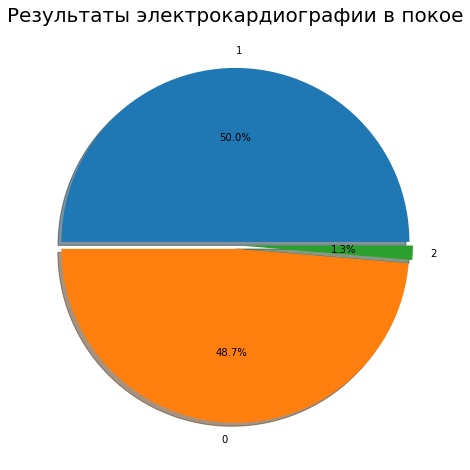

In [21]:
pie, ax = plt.subplots(figsize=[10,8])
labels = data.keys()
plt.pie(x=data, explode=[0.02]*3, autopct='%1.1f%%', labels=labels, shadow=True)
plt.title('Результаты электрокардиографии в покое', fontsize=20)

Количество ЭКГ практически одинаково для типов 0 и 1.

Кроме того, для типа 2 это почти несущественно по сравнению с типом 0 и 1.

## Аномалия коронарной артерии

In [22]:
data = df['caa'].value_counts()
data

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

Text(0.5, 1.0, 'Аномалия коронарной артерии')

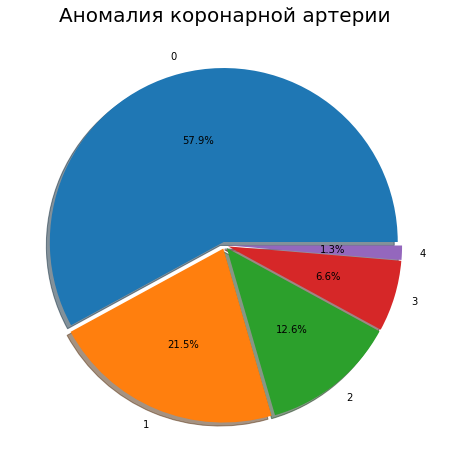

In [23]:
pie, ax = plt.subplots(figsize=[10,8])
labels = data.keys()
plt.pie(x=data, explode=[0.02]*5, autopct='%1.1f%%', labels=labels, shadow=True)
plt.title('Аномалия коронарной артерии', fontsize=20)

<AxesSubplot:xlabel='caa', ylabel='age'>

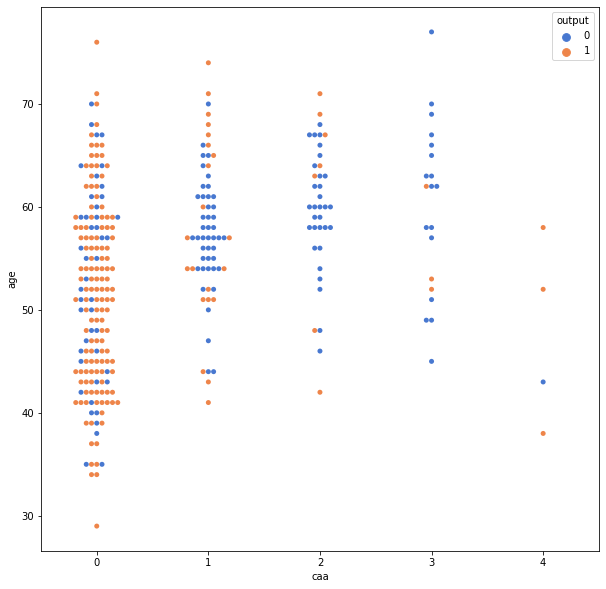

In [24]:
plt.figure(figsize = (10,10))
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='muted')

Из наблюдения видно:
    
Люди из категории 0 вне завиьсимости от возраста подвержены сердечным приступам.

Людей из 4 категории представлено меньше, при этом 75% из них подвержено серденому приступу.

1, 2, 3 категории людей менее подвержены середеному приступу относительно других категориий.

## Матрица корреляций

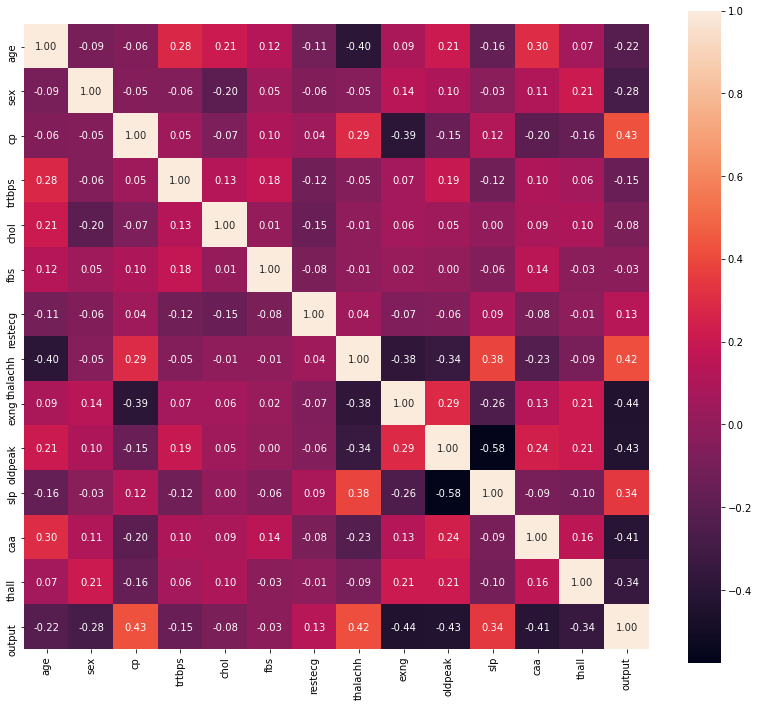

In [25]:
corr = df.corr()

plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

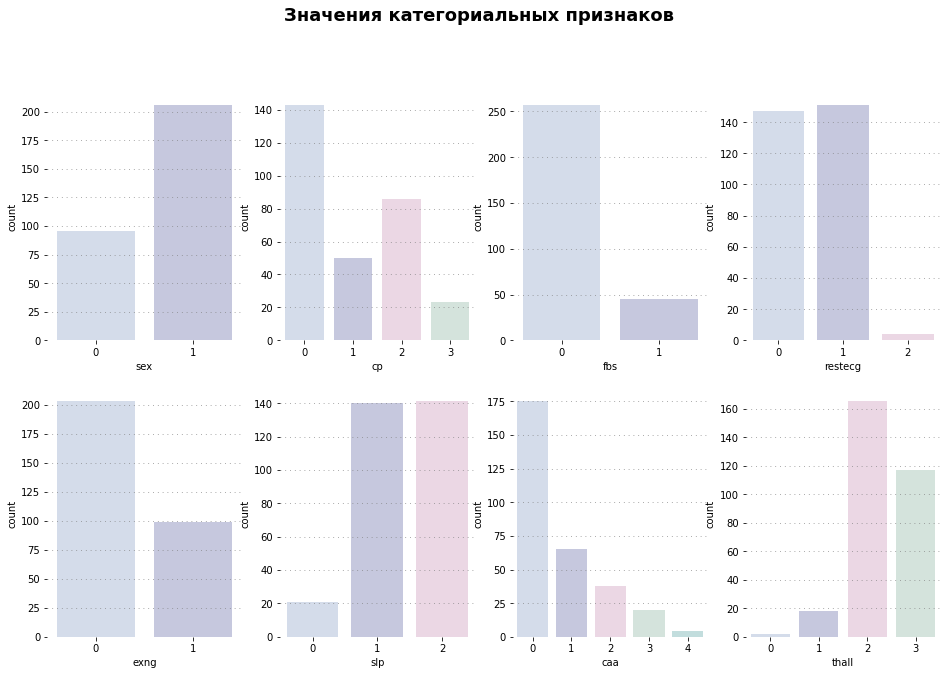

In [26]:
colors = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
j=0
fig=plt.figure(figsize=(16,10),constrained_layout =True)
plt.suptitle("Значения категориальных признаков",y=1, size=18, weight='bold')

for i in df[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='grey', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax=sns.countplot(data=df, x=i, palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)    
    j=j+1

Из приведенных выше графиков мы видим, что у нас есть разные функции, которые имеют общий и необычный тип категорий в нашем наборе данных.

Но этого недостаточно, чтобы рассказать нам об особенностях. Давайте сравним все категориальные характеристики с целевым столбцом.

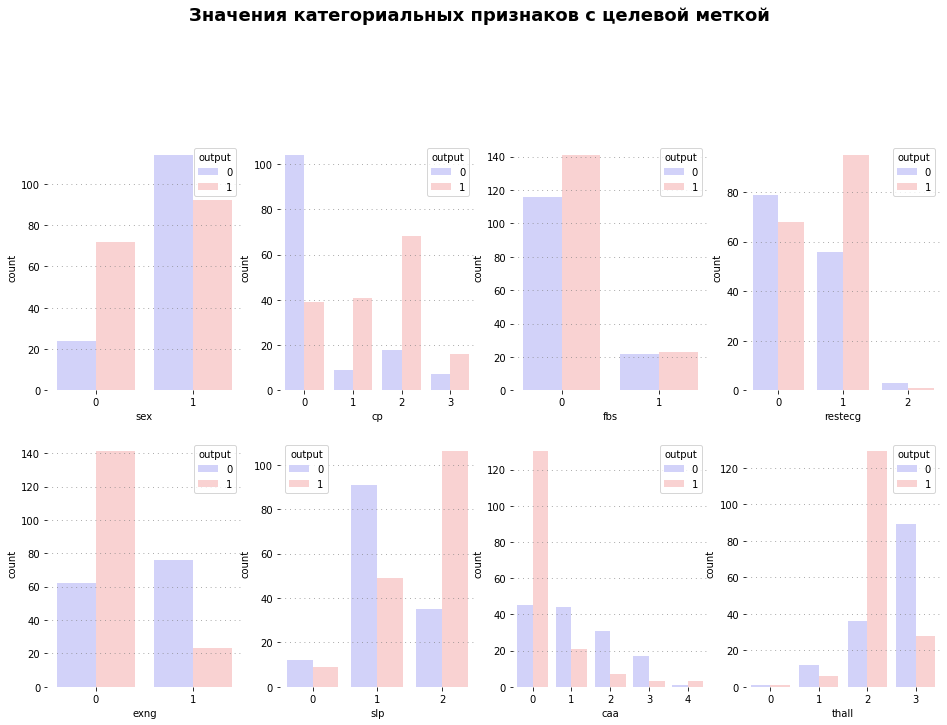

In [27]:
colors = ['#ccccff','#ffcccc']
j=0
fig=plt.figure(figsize=(16,10),constrained_layout =True)
plt.suptitle("Значения категориальных признаков с целевой меткой",y=1.07, size=18, weight='bold')

for i in df[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax=sns.countplot(data=df, x=i, hue='output', palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    j=j+1

Из вышеперечисленных категориальных признаков мы видим, что:

В «Боль в груди» Тип 0 имеет наибольшее количество людей, у которых меньше шансов пострадать от сердечного приступа.

Уровень сахара в крови натощак и ЭКГ в состоянии покоя не имеют большой разницы в их соответствующих состояниях.

При стенокардии, вызванной физическими упражнениями, тип 0 имеет наибольшее количество людей, которые могут пострадать от сердечного приступа.



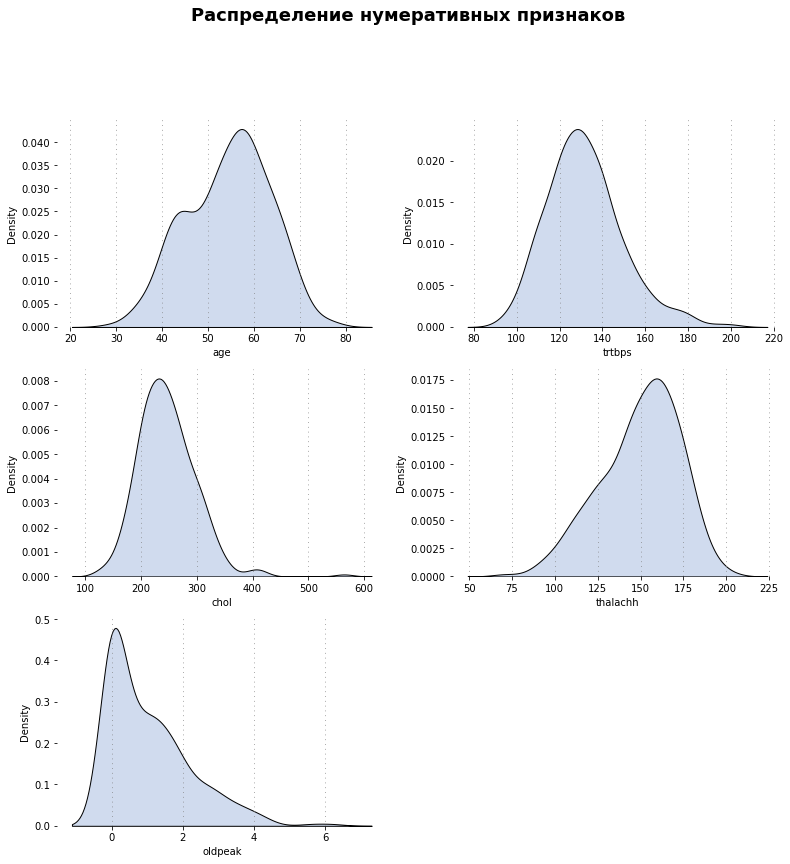

In [28]:
j=0
fig=plt.figure(figsize=(13,13),constrained_layout =True)
plt.suptitle("Распределение нумеративных признаков",y=1, size=18, weight='bold')

for i in df[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=df, x=i, color='#D0DBEE', fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)    
    j=j+1

Из приведенных выше графиков мы видим, что плотность распределения различных функций искажена. Давайте также сравним их с целевым столбцом.

findfont: Font family ['Sherif'] not found. Falling back to DejaVu Sans.


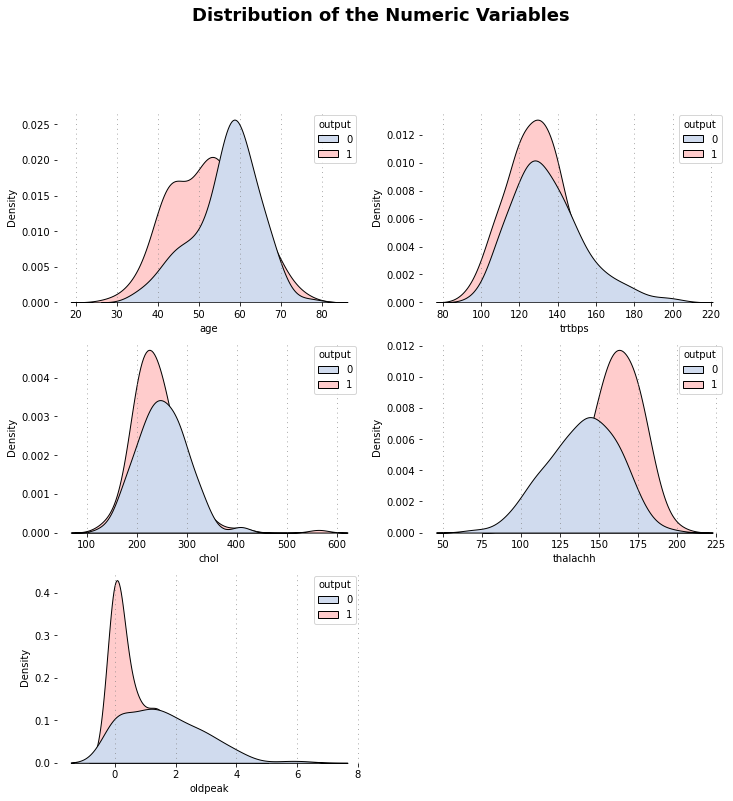

In [29]:
colors = ['#D0DBEE','#ffcccc']
j=0
fig=plt.figure(figsize=(12,12),constrained_layout =True)
plt.suptitle("Distribution of the Numeric Variables",y=1, family='Sherif', size=18, weight='bold')

for i in df[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=df, x=i, hue='output', palette=colors, fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)    
    j=j+1

📌 From the above distribution plot, we can see that, Age and Max. Heart Rate is Negative Skewed and Resting Blood Pressure, Cholesterol, and Previous Peak are Positive Skewed.


## Scatter Plot

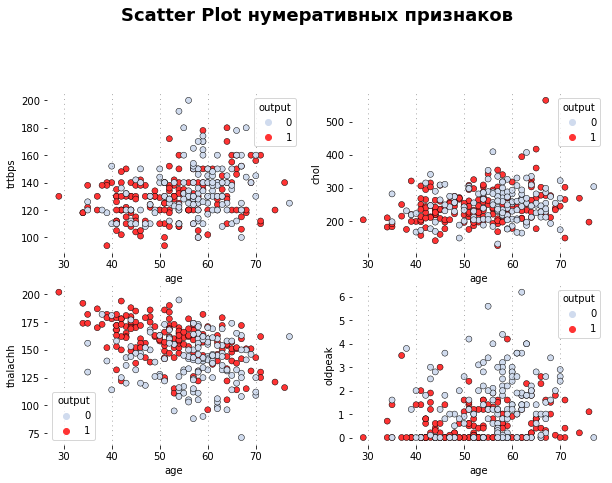

In [30]:
colors = ['#D0DBEE','#ff3333']
num_cols = ['trtbps','chol','thalachh','oldpeak']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Scatter Plot нумеративных признаков",y=1, family='Sherif', size=18, weight='bold')

for i in df[num_cols]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.scatterplot(data=df,x=df['age'],y=i,hue=df['output'],ec='black',palette=colors)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    plt.subplots_adjust(wspace=0.2, hspace=0.2) 
    j=j+1

Из приведенного выше графика мы видим, что связь между возрастом и различными числовыми характеристиками в нашем наборе данных с условием. На нашем графике также может быть несколько выбросов.

Как обнаружить выбросы?
Используем Boxen Plot для обнаружения выбросов каждой функции в нашем наборе данных, где любая точка выше или ниже усов представляет собой выброс. Это также известно как «Одномерный метод», поскольку здесь мы используем анализ выбросов с одной переменной.

## Boxen Plot

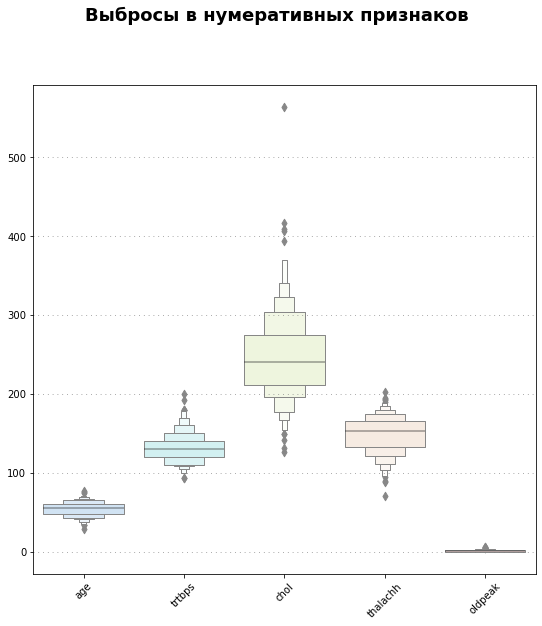

In [31]:
colors = ['#CBE4F9','#CDF5F6','#EFF9DA','#F9EBDF','#F9D8D6']
plt.figure(figsize=(9,9))
plt.suptitle("Выбросы в нумеративных признаков",y=1, family='Sherif', size=18, weight='bold')

sns.boxenplot(data = df[numerical],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

После обнаружения мы используем Median Imputation для устранения выбросов. В этом методе мы заменяем крайние значения средними значениями.

Он представлен формулой IQR = Q3 - Q1. Строки кода ниже вычисляют и распечатывают межквартильный диапазон для каждой из переменных в наборе данных.

Не рекомендуется использовать средние значения, поскольку на них влияют выбросы.

In [32]:
for i in df[numerical]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[i])
    for j in df[i]:
        if j > Upper_tail or j < Lower_tail:
            df[i] = df[i].replace(j, med)

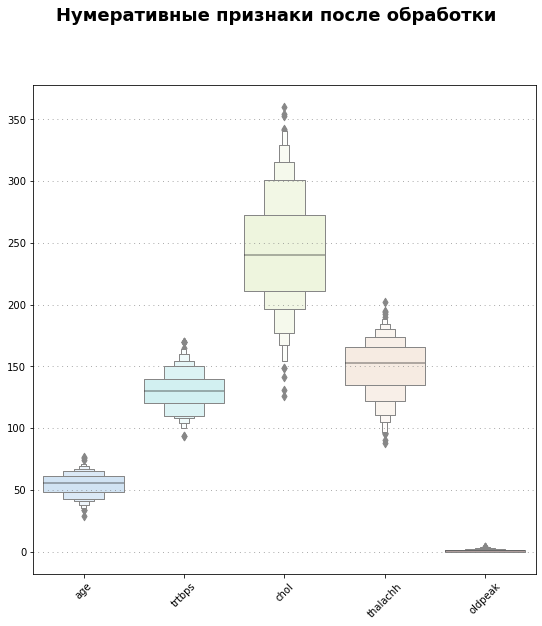

In [33]:
colors = ['#CBE4F9','#CDF5F6','#EFF9DA','#F9EBDF','#F9D8D6']
plt.figure(figsize=(9,9))
plt.suptitle("Нумеративные признаки после обработки",y=1, size=18, weight='bold')
sns.boxenplot(data = df[numerical],palette = colors)
plt.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

## Pair Plot 

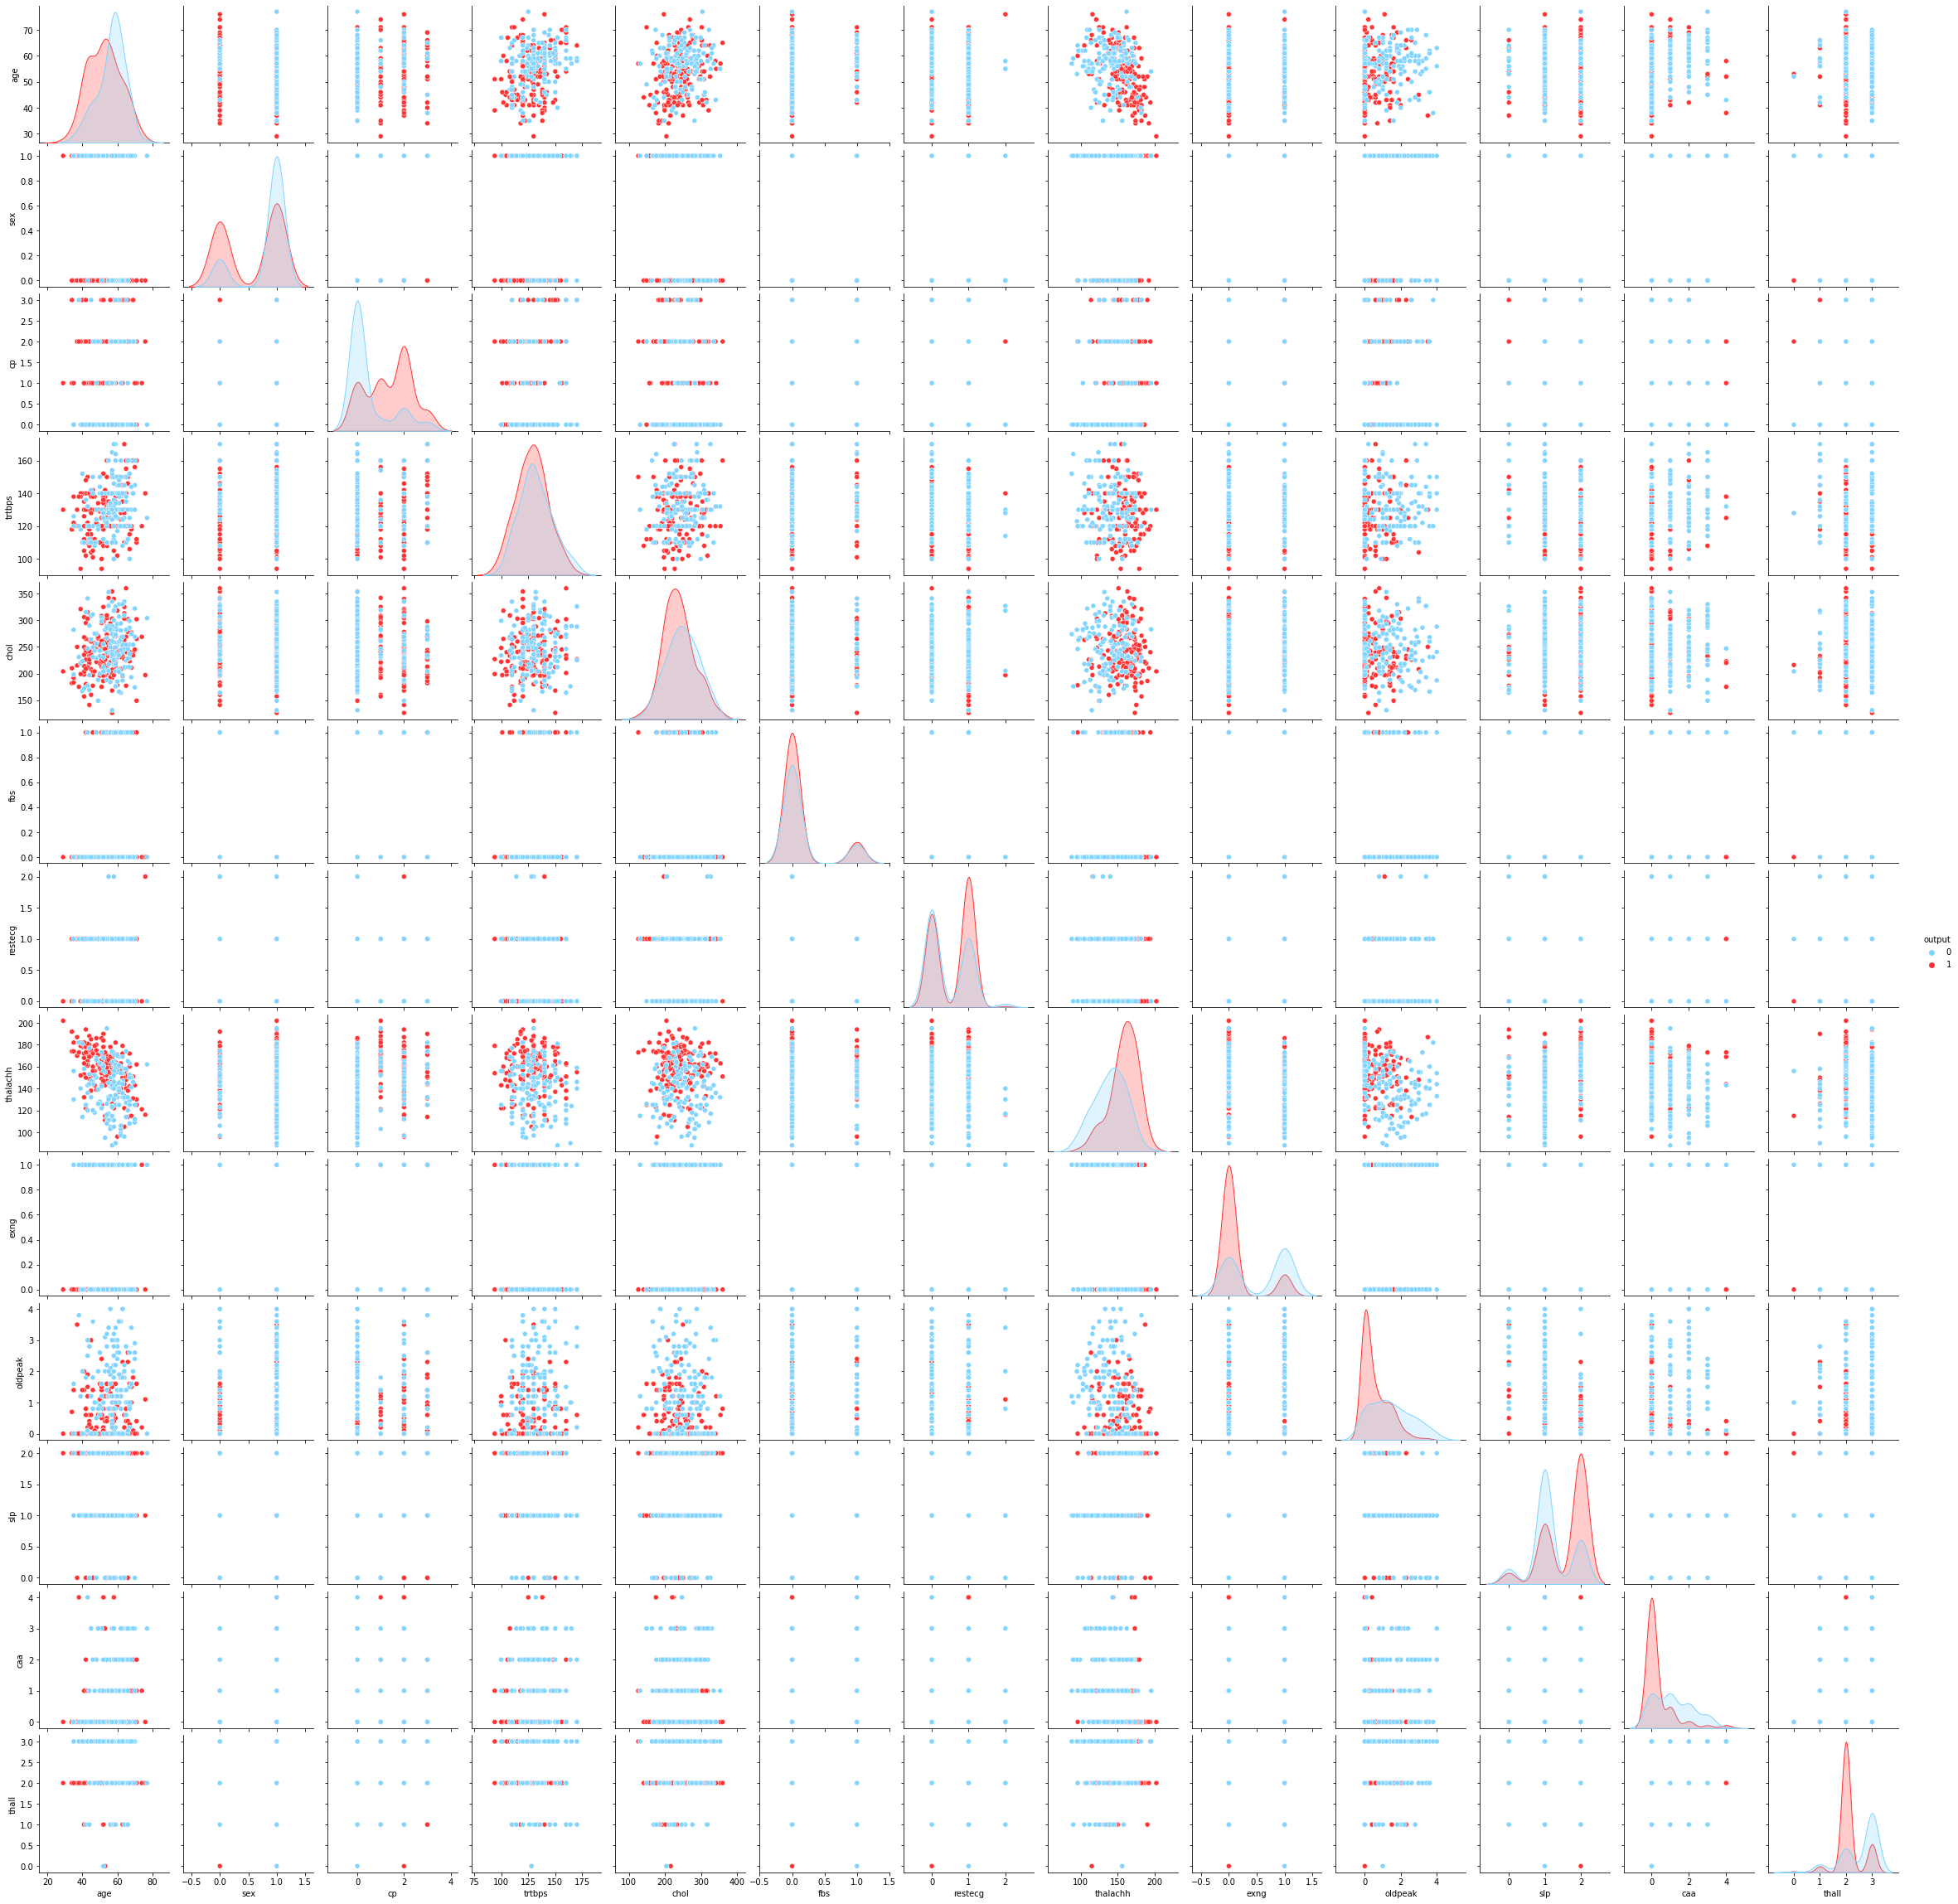

In [34]:
colors = ['#80d4ff','#ff3333']
sns.pairplot(data=df,hue='output',diag_kind='kde',palette=colors)
plt.show()

Приведенные выше графики создают матрицу отношений между каждой переменной в ваших данных для мгновенного изучения наших данных. Мы видим, что выбросы в нашем наборе данных устранены.

# KNN

In [35]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
df[df.columns] = scalerX.fit_transform(df[df.columns])

In [36]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#x = df.drop(['output'], axis=1).values
#y = df['output'].values


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [38]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (241, 13)
Number transactions y_train dataset:  (241,)
Number transactions x_test dataset:  (61, 13)
Number transactions y_test dataset:  (61,)


In [39]:
knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.array(np.linspace(2, 60, 58), dtype= 'int')}

In [40]:
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

In [41]:
gs.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 60])})

In [42]:
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [43]:
gs.cv_results_['mean_test_score']

array([0.74486339, 0.79786885, 0.79459016, 0.78136612, 0.80114754,
       0.79131148, 0.78131148, 0.77142077, 0.79114754, 0.79459016,
       0.78786885, 0.78469945, 0.78781421, 0.79453552, 0.79125683,
       0.79459016, 0.78464481, 0.79797814, 0.79136612, 0.79797814,
       0.78797814, 0.79797814, 0.79459016, 0.80453552, 0.80120219,
       0.80125683, 0.80453552, 0.80453552, 0.80459016, 0.79136612,
       0.8079235 , 0.7947541 , 0.80464481, 0.80131148, 0.80131148,
       0.80136612, 0.80464481, 0.79142077, 0.79469945, 0.79803279,
       0.80131148, 0.79469945, 0.79142077, 0.78814208, 0.78814208,
       0.79147541, 0.78814208, 0.78486339, 0.78814208, 0.78486339,
       0.78486339, 0.78486339, 0.78486339, 0.7815847 , 0.77830601,
       0.78491803, 0.7815847 , 0.78814208])

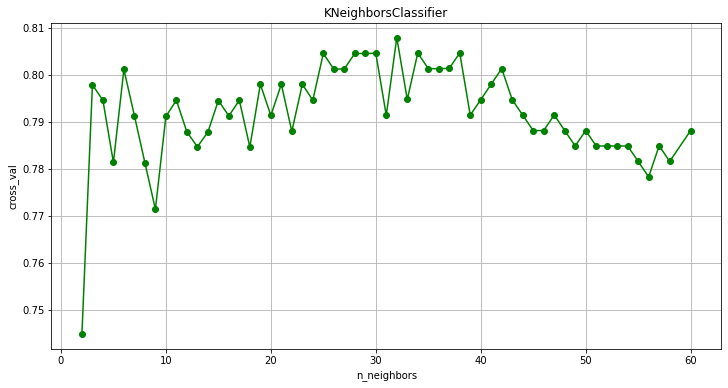

In [44]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [45]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(x, dtype='float'), with_std=True, with_mean=True)


{'n_neighbors': 34} 0.8244444444444444


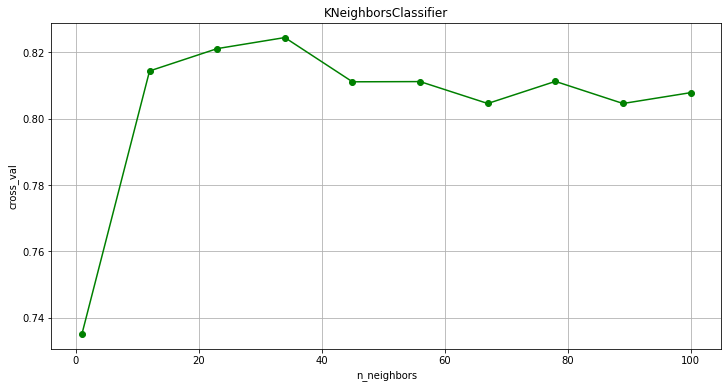

In [46]:
grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
gs = GridSearchCV(knn, grid, cv=6)  
x_knn = gs.fit(X_scaled, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [47]:
# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier() 
# тренируем для knn и для dummy
clf_knn = knn.fit(x_train, y_train)

In [48]:
# получаем предикты
y_knn = clf_knn.predict(x_test)
# ответы knn
y_knn

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0.])

In [49]:
# реальные ответы
y_test

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0.])

In [50]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn))

knn = 0.8032786885245902


In [51]:
print ('knn =', metrics.recall_score(y_test, y_knn))

knn = 0.7741935483870968


In [52]:
predictions_knn_proba = clf_knn.predict_proba(x_test)

predictions_knn_proba.shape

(61, 2)

KNN ROC AUC = 0.8726


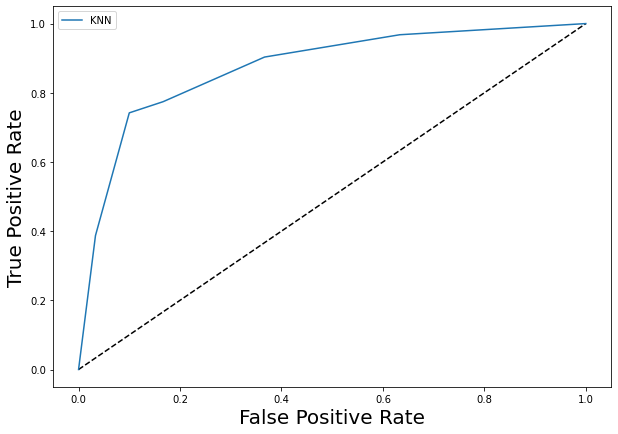

In [53]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, predictions_knn_proba[:,1])

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')

plt.legend()
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)

print ('KNN ROC AUC = {0:.4f}'.format(auc(fpr_knn, tpr_knn)))

# Реализация конвеера

In [54]:
class DataPreprocessing:
    def __init__(self):
        self.numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
        self.categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
        
    def transform(self, X):
        X.drop_duplicates(inplace=True)
        
        for i in X[self.numerical]:
            q1 = X[i].quantile(0.25)
            q3 = X[i].quantile(0.75)
            iqr = q3-q1
            Lower_tail = q1 - 1.5 * iqr
            Upper_tail = q3 + 1.5 * iqr
            med = np.median(X[i])
            for j in X[i]:
                if j > Upper_tail or j < Lower_tail:
                    X[i] = X[i].replace(j, med)
        
        return X

In [57]:
class My_class:
    def __init__(self):
        self.X=df.drop(["output"],axis=1)
        self.y=df["output"]
        scalerX = MinMaxScaler(feature_range=(0, 1))
        self.X[self.X.columns] = scalerX.fit_transform(self.X[self.X.columns])
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=2021)


    def all_algoritm(self, X):
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import confusion_matrix
        from sklearn.preprocessing import StandardScaler
        from sklearn.linear_model import LogisticRegression
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.svm import SVC
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.ensemble import GradientBoostingClassifier
        from sklearn.ensemble import AdaBoostClassifier
        import xgboost as xgb
        key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','XGBClassifier']
        value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier()]
        models = dict(zip(key,value))
        
        predicted =[]
        
        for name, algo in models.items():
            model=algo
            model.fit(x_train,y_train)
            predict = model.predict(x_test)
            acc = accuracy_score(y_test, predict)
            predicted.append(acc)
            print(name,acc)
        

In [58]:
preprocessing = DataPreprocessing()
X = preprocessing.transform(df)
models = My_class()
result = models.all_algoritm(X)

Метрика выбрана accuracy так как целевая метка сбалансирована.

LogisticRegression 0.8852459016393442
KNeighborsClassifier 0.8032786885245902
SVC 0.8524590163934426
DecisionTreeClassifier 0.6721311475409836
RandomForestClassifier 0.8032786885245902
GradientBoostingClassifier 0.7704918032786885
XGBClassifier 0.7704918032786885
